## Problem Statement
A US-based housing company named Surprise Housing is looking at prospective properties to buy to enter the market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
A regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not is required.

Bussiness Goals
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression

#### Import libraries

In [2442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Notebook structure
- Summary statistics
- Data Cleaning
    - handling duplicates
    - remove irrelevant columns
- Data preprocessing
    - Missing value handling
    - encoding categorical features
    - Numerical data handling, creating derived columns
    - Correlations and Intution from EDA
- Preparing data for Modelling
    - split into train and test set
    - scale data
- Create Ridge and Lasso models and build evaluation metrics
- Compare evaluation metrics and coefficients
- Conclusion

#### Summary stats

In [2443]:
df = pd.read_csv("data/train.csv")
org_df = df.copy()

In [2444]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2446]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


In [2447]:
df.describe(include=['O']).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Data cleaning

### Handling duplicates

#### Handling duplicate rows
    - no such rows

In [2448]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### Drop columns where all values are same
    - no such column

In [2449]:
df.columns[df.nunique() <= 1]

Index([], dtype='object')

#### Drop non-relevant column 

In [2450]:
df = df.drop(['Id'], axis = 1)

### Handling missing data

#### Columns with missing value %

In [2451]:
missing_value_df = round(df.isnull().sum() / len(df)  * 100,2)
missing_value_df[missing_value_df > 0].sort_values(ascending=False)

PoolQC         99.520
MiscFeature    96.300
Alley          93.770
Fence          80.750
FireplaceQu    47.260
LotFrontage    17.740
GarageYrBlt     5.550
GarageType      5.550
GarageFinish    5.550
GarageQual      5.550
GarageCond      5.550
BsmtFinType2    2.600
BsmtExposure    2.600
BsmtFinType1    2.530
BsmtCond        2.530
BsmtQual        2.530
MasVnrArea      0.550
MasVnrType      0.550
Electrical      0.070
dtype: float64

#### 1. PoolArea (99.52% missing value) and PoolQC

In [2452]:
df.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [2453]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**PoolQC and PoolArea can be combined into 1 column --> has_pool since only 6 out of 1460 houses have pool**

In [2454]:
df['has_pool'] = df.apply(lambda row : 1 if row['PoolArea'] > 0 else 0, axis=1)
# drop PoolArea and PoolQC
df = df.drop(['PoolArea', 'PoolQC'], axis = 1)

#### 2. MiscFeature has 96 % missing values, replacing MiscFeature with has_misc representing whether a house has miscellaneous feature

In [2455]:
df.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [2456]:
df['has_misc'] = df.apply(lambda row : 1 if pd.notnull(row['MiscFeature']) else 0, axis=1)

# drop MiscFeature
df = df.drop(['MiscFeature'], axis = 1)

In [2457]:
df.has_misc.value_counts()

0    1406
1      54
Name: has_misc, dtype: int64

#### 3. Alley (93.77% missing values)
    - here nan means no alley, replace Nan with no_alley

In [2458]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [2459]:
df['Alley'] = df['Alley'].fillna(value="no_alley")
df.Alley.value_counts()

no_alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64

#### 4. Fence (80 % missing values)
    - Here Nan means No Fence, replace Nan with no fence

In [2460]:
df['Fence'] = df['Fence'].fillna(value="no_fence")
df.Fence.value_counts()

no_fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

#### 5. FireplaceQu (47 % missing values)
    - Here Nan means No Fireplace, replace Nan with no_fireplace

In [2461]:
df['FireplaceQu'] = df['FireplaceQu'].fillna(value="no_fireplace")
df.FireplaceQu.value_counts()

no_fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

####  6. LotFrontage (17 % missing values)

In [2462]:
df.LotFrontage.describe()

count   1201.000
mean      70.050
std       24.285
min       21.000
25%       59.000
50%       69.000
75%       80.000
max      313.000
Name: LotFrontage, dtype: float64

In [2463]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

#### 7. Garage related features
    - GarageCond and GarageQual represent similar info, anyone can be dropped
    - Nan in GarageQual means no garage, replace it
    - Nan in GarageFinish means no garage, replace it
    - replace GarageYrBlt with garage age, no garage means age 0
    - Nan in GarageType means no garage, replace it

**GarageCond and GarageQual**

In [2464]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [2465]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [2466]:
df = df.drop(['GarageCond'], axis = 1)

In [2467]:
df['GarageQual'] = df['GarageQual'].fillna(value="no_garage")

**GarageFinish**

In [2468]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [2469]:
df['GarageFinish'] = df['GarageFinish'].fillna(value="no_garage")

**GarageYrBlt**
- create derived column using GarageYrBlt
- subtract each value from 2021
- fill nan values by 0
- drop column GarageYrBlt

In [2470]:
df.GarageYrBlt.describe()

count   1379.000
mean    1978.506
std       24.690
min     1900.000
25%     1961.000
50%     1980.000
75%     2002.000
max     2010.000
Name: GarageYrBlt, dtype: float64

In [2471]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=2021)
df['garage_age'] = df['GarageYrBlt'].apply(lambda value : 2021 - value)
df = df.drop(['GarageYrBlt'], axis = 1)

In [2472]:
df.garage_age.describe()

count   1460.000
mean      40.136
std       25.893
min        0.000
25%       18.000
50%       36.500
75%       59.000
max      121.000
Name: garage_age, dtype: float64

**GarageType**

In [2473]:
df['GarageType'] = df['GarageType'].fillna(value='no_garage')

In [2474]:
df.GarageType.value_counts()

Attchd       870
Detchd       387
BuiltIn       88
no_garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

#### Basement related fields
- Nan in BsmtFinType2 means no basement, replace it with no_basement
- Nan in BsmtExposure means no basement, replace it with no_basement
- Nan in BsmtFinType1 means no basement, replace it with no_basement
- Nan in BsmtCond means no basement, replace it with no_basement
- Nan in BsmtQual means no basement, replace it with no_basement

In [2475]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(value='no_basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna(value='no_basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(value='no_basement')
df['BsmtCond'] = df['BsmtCond'].fillna(value='no_basement')
df['BsmtQual'] = df['BsmtQual'].fillna(value='no_basement')

#### MasVnrArea
    - here nan means area is 0, replace nan with 0

In [2476]:
df['MasVnrArea'].describe()

count   1452.000
mean     103.685
std      181.066
min        0.000
25%        0.000
50%        0.000
75%      166.000
max     1600.000
Name: MasVnrArea, dtype: float64

In [2477]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(value=df['MasVnrArea'].median())

#### MasVnrType
- NaN in MasVnrType means no Masonry, replace it with None

In [2478]:
df[pd.isnull(df['MasVnrType'])][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.000
529,NaN,0.000
650,NaN,0.000
936,NaN,0.000
973,NaN,0.000
977,NaN,0.000
1243,NaN,0.000
1278,NaN,0.000


In [2479]:
df['MasVnrType'] = df['MasVnrType'].fillna(value='None')

In [2480]:
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### Electrical (1 row)
    On examining the house with electrical value None, the house should have electricity, replcing it with mode value

In [2481]:
df[pd.isnull(df['Electrical'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_pool,has_misc,garage_age
1379,80,RL,73.000,9735,Pave,no_alley,Reg,Lvl,AllPub,Inside,...,no_fence,0,5,2008,WD,Normal,167500,0,0,14.000


In [2482]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [2483]:
df['Electrical'] = df['Electrical'].fillna(value=df['Electrical'].mode().values[0])

In [2484]:
missing_value_df = round(df.isnull().sum() / len(df)  * 100,2)
missing_value_df[missing_value_df > 0].sort_values(ascending=False)

Series([], dtype: float64)

### Data exploration

#### 1. Distribution of target varibale 'SalePrice'

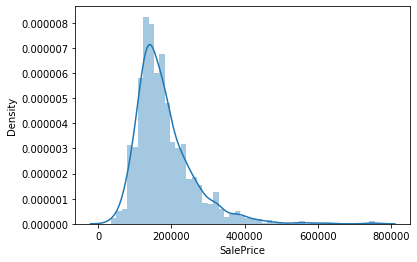

In [2485]:
sns.distplot(df.SalePrice)

#### Correlation of features with target variable

In [2486]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

#### 2. Check correlations of other features with SalePrice

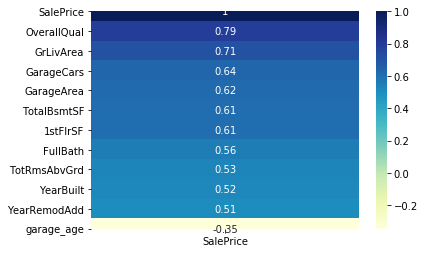

In [2487]:
corr_df = pd.DataFrame(df.corr()['SalePrice'].sort_values(ascending=False))
corr_df = corr_df[(corr_df.SalePrice > 0.5) | (corr_df.SalePrice < -0.3)]
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)

### Data preprocessing 

#### 1. Encoding categorical variables
- Label Encoding
    - Utilities, ExterCond, ExterQual, BsmtQual, BsmtCond
    - BsmtExposure, BsmtFinType1, BsmtFinType2,  HeatingQC
    - KitchenQual, Functional, FireplaceQu, GarageQual, GarageFinish
    - PavedDrive, Fence
- One Hot Encoding
    - MSZoning, Street, Alley, LotShape, LandContour
    - LotConfig, LandSlope, Neighborhood, Condition1, Condition2
    - BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st
    - Exterior2nd, MasVnrType, Foundation, Heating
    - Electrical, GarageType, SaleType, SaleCondition
- Convert to binary
    - CentralAir
    
#### 2. Handling numeric data types

In [2488]:
categorical_df = df.select_dtypes(include=['object'])

In [2489]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

**Label Encoding**

In [2490]:
def label_encode(val, mapping):
    return mapping[val]

In [2491]:
# 1. Utilities
mapping_utilities = {'ELO' : 1, 'NoSeWa' : 2, 'NoSewr': 3, 'AllPub' : 4}
df['Utilities'] = df['Utilities'].apply(lambda val : label_encode(val, mapping_utilities))

In [2492]:
df['Utilities'].value_counts()

4    1459
2       1
Name: Utilities, dtype: int64

In [2493]:
# 2. ExterCond
mapping_ExterCond = {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}
df['ExterCond'] = df['ExterCond'].apply(lambda val : label_encode(val, mapping_ExterCond))

In [2494]:
# 3. ExterCond
df['ExterQual'] = df['ExterQual'].apply(lambda val : label_encode(val, mapping_ExterCond))

In [2495]:
# 4. BsmtQual
mapping_BsmtQual = {'no_basement':0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}
df['BsmtQual'] = df['BsmtQual'].apply(lambda val : label_encode(val, mapping_BsmtQual))

In [2496]:
# 5. BsmtCond
df['BsmtCond'] = df['BsmtCond'].apply(lambda val : label_encode(val, mapping_BsmtQual))

In [2497]:
# 6. BsmtExposure
'''
     Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
    '''
mapping_BsmtExposure = {'no_basement':0, 'No' : 1, 'Mn' : 2, 'Av': 3, 'Gd' : 4}
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda val : label_encode(val, mapping_BsmtExposure))

In [2498]:
# 7. BsmtFinType1
'''
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
'''
mapping_BsmtFinType1 = {'no_basement':0, 'Unf' : 1, 'LwQ' : 2, 'Rec': 3, 'BLQ' : 4,
                        'ALQ' : 5, 'GLQ':6}
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda val : label_encode(val, mapping_BsmtFinType1))

In [2499]:
# 8. BsmtFinType2
'''
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
'''
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda val : label_encode(val, mapping_BsmtFinType1))

In [2500]:
# 10. HeatingQC
'''
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
'''
mapping_HeatingQC = {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}
df['HeatingQC'] = df['HeatingQC'].apply(lambda val : label_encode(val, mapping_HeatingQC))

In [2501]:
# 11. KitchenQual
'''
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
'''
df['KitchenQual'] = df['KitchenQual'].apply(lambda val : label_encode(val, mapping_HeatingQC))

In [2502]:
# 12. Functional
'''
       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
'''
mapping_Functional = {'Sal' : 1, 'Sev' : 2, 'Maj2': 3, 'Maj1' : 4, 'Mod' : 5, 'Min2' : 6,
                      'Min1' : 7, 'Typ' : 8}
df['Functional'] = df['Functional'].apply(lambda val : label_encode(val, mapping_Functional))

In [2503]:
# 13. FireplaceQu
'''
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
'''
mapping_FireplaceQu = {'no_fireplace':0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}
df['FireplaceQu'] = df['FireplaceQu'].apply(lambda val : label_encode(val, mapping_FireplaceQu))

In [2504]:
# 14. GarageQual
'''
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
'''
mapping_GarageQual = {'no_garage':0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}
df['GarageQual'] = df['GarageQual'].apply(lambda val : label_encode(val, mapping_GarageQual))

In [2505]:
# 15. GarageFinish
'''
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
'''
mapping_GarageFinish = {'no_garage':0, 'Unf' : 1, 'RFn' : 2, 'Fin': 3}
df['GarageFinish'] = df['GarageFinish'].apply(lambda val : label_encode(val, mapping_GarageFinish))

In [2506]:
# 16. PavedDrive
'''
       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
'''
mapping_PavedDrive = {'N':1, 'P' : 2, 'Y' : 3}
df['PavedDrive'] = df['PavedDrive'].apply(lambda val : label_encode(val, mapping_PavedDrive))

In [2507]:
# 17. Fence
'''
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
'''
mapping_Fence = {'no_fence':0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4}
df['Fence'] = df['Fence'].apply(lambda val : label_encode(val, mapping_Fence))

In [2508]:
# 17. CentralAir
'''
       N	No
       Y	Yes
'''
mapping_CentralAir = {'N':0, 'Y' : 1}
df['CentralAir'] = df['CentralAir'].apply(lambda val : label_encode(val, mapping_CentralAir))

**Dummy encoding**

In [2509]:
cat_cols = ["MSZoning","Street","Alley","LotShape","LandContour",
"LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
"BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st",
"Exterior2nd","MasVnrType","Foundation","Heating",
"Electrical","GarageType","SaleType","SaleCondition"]
df_cat = df[cat_cols]

In [2510]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummies[:2]

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_no_alley,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [2511]:
df = df.drop(cat_cols, axis=1)
df = pd.concat([df, df_cat_dummies], axis=1)
df[:2]

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,4,7,5,2003,2003,196.000,4,...,0,0,0,0,1,0,0,0,1,0
1,20,80.000,9600,4,6,8,1976,1976,0.000,3,...,0,0,0,0,1,0,0,0,1,0


In [2512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 201 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(52), uint8(146)
memory usage: 835.6 KB


### Handling numerical cols
       'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'

**1. YearBuilt can be converted to house age**

In [2513]:
df.YearBuilt.describe()

count   1460.000
mean    1971.268
std       30.203
min     1872.000
25%     1954.000
50%     1973.000
75%     2000.000
max     2010.000
Name: YearBuilt, dtype: float64

In [2514]:
df['house_age'] = df.YearBuilt.apply(lambda value : 2021 - value)

**2. YearRemodAdd can be converted to derived column remodel_age**

In [2515]:
df['remodel_age'] = df.apply(lambda row : 2021 - row['YearRemodAdd']
                             if row['YearRemodAdd'] > row['YearBuilt']
                             else 0
                             , axis=1)

In [2516]:
df = df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

**3. MoSold and YrSold information is irrelevant, so we can drop it**

In [2517]:
df = df.drop(['MoSold', 'YrSold'], axis=1)

#### Check correlations

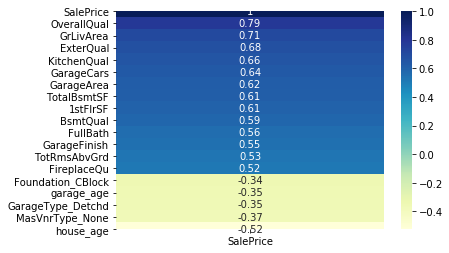

In [2518]:
corr_df = pd.DataFrame(df.corr()['SalePrice'].sort_values(ascending=False))
corr_df = corr_df[(corr_df.SalePrice > 0.5) | (corr_df.SalePrice < -0.3)]
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)

##### Factors affecting house sale price
    - Positive correlations with OverallQual, GrLivArea, ExterQual, KitchenQual, Garage Area
    - Negative correaltion with house age, no Masonry
    

### Prepare Data for Modelling

#### Split data into train and test data set

In [2519]:
cols = list(df.columns)

In [2520]:
y_col = 'SalePrice'
cols.remove('SalePrice')
X_col = cols

In [2521]:
df_X = df[X_col]
y = df[y_col]
df_X.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,house_age,remodel_age
0,60,65.000,8450,4,7,5,196.000,4,3,4,...,0,0,1,0,0,0,1,0,18,0.000
1,20,80.000,9600,4,6,8,0.000,3,3,4,...,0,0,1,0,0,0,1,0,45,0.000
2,60,68.000,11250,4,7,5,162.000,4,3,4,...,0,0,1,0,0,0,1,0,20,19.000
3,70,60.000,9550,4,7,5,0.000,3,3,3,...,0,0,1,0,0,0,0,0,106,51.000
4,60,84.000,14260,4,8,5,350.000,4,3,4,...,0,0,1,0,0,0,1,0,21,0.000


In [2522]:
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Scale data

In [2523]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_X))

In [2524]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
0,0.235,0.151,0.033,1.000,0.667,0.500,0.122,0.667,0.500,0.800,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.051,0.000
1,0.000,0.202,0.039,1.000,0.556,0.875,0.000,0.333,0.500,0.800,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.246,0.000
2,0.235,0.161,0.047,1.000,0.667,0.500,0.101,0.667,0.500,0.800,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.065,0.268
3,0.294,0.134,0.039,1.000,0.667,0.500,0.000,0.333,0.500,0.600,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.688,0.718
4,0.235,0.216,0.061,1.000,0.778,0.500,0.219,0.667,0.500,0.800,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.072,0.000


In [2525]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [2526]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
210,0.059,0.158,0.020,1.000,0.444,0.625,0.000,0.333,0.500,0.600,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.616,1.000
318,0.235,0.236,0.040,1.000,0.667,0.500,0.160,0.667,0.500,0.800,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.123,0.000
239,0.176,0.106,0.035,1.000,0.556,0.375,0.000,0.333,0.500,0.600,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.471,1.000
986,0.176,0.130,0.019,1.000,0.556,0.875,0.000,0.333,0.750,0.600,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.725,0.254
1416,1.000,0.134,0.047,1.000,0.333,0.625,0.000,0.333,0.500,0.600,...,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.906,1.000


### Ridge Regression

In [2527]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        n_jobs= -1,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2528]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [2529]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### Evaluation metrics

In [2530]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

0.8751630474328228
0.8605770480208271
796546993375.7631
392993221762.1255
27931.40810349944
29954.044777686795


### Lasso Regression

In [2531]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs= -1,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [2532]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [2533]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [2534]:
lasso.coef_

array([-3.09334140e+04, -0.00000000e+00,  5.04499815e+03,  0.00000000e+00,
        9.71585519e+04,  2.88694013e+04,  2.99552507e+04,  1.54301429e+04,
       -0.00000000e+00,  1.92222626e+04, -1.17872314e+04,  3.31408114e+04,
        1.19021640e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.64028095e+03,  0.00000000e+00,  2.13122048e+03,  1.40159606e+03,
        0.00000000e+00,  2.54263681e+04, -1.06604124e+03,  2.48885369e+05,
        2.30723590e+04,  0.00000000e+00,  1.18712467e+04,  4.31427086e+03,
       -0.00000000e+00, -0.00000000e+00,  2.56943254e+04,  0.00000000e+00,
        1.29292615e+04,  5.24236812e+03,  7.04991956e+03,  9.54535276e+03,
        3.94081351e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.58826776e+03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.49519944e+02, -1.30177338e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.15455807e+03, -

In [2535]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

0.8858805000203966
0.8533189815816067
728162156516.7787
413451624580.4711
26705.52875215547
30723.825946280376


### Comaparing Ridge and Lasso

In [2536]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)']
            }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric = final_metric[-final_metric['Metric'].isin(['RSS (Train)', 'RSS (Test)'])]

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.875,0.886
1,R2 Score (Test),0.861,0.853
4,RMSE (Train),27931.408,26705.529
5,RMSE (Test),29954.045,30723.826


#### Comparing coefficients 

In [2537]:
betas = pd.DataFrame(index=df_X.columns)
betas.rows = df_X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
MSSubClass,-20806.402,-30933.414
LotFrontage,2398.644,-0.000
LotArea,16298.294,5044.998
Utilities,5816.841,0.000
OverallQual,64656.674,97158.552
OverallCond,24711.772,28869.401
MasVnrArea,28166.702,29955.251
ExterQual,21635.641,15430.143
ExterCond,-1478.715,-0.000
BsmtQual,24029.001,19222.263


In [2538]:
"Number of features using Ridge : {}".format(len(ridge.coef_))

'Number of features using Ridge : 198'

In [2539]:
"Number of features using Ridge : {}".format(len([coeff for coeff in list(lasso.coef_) if coeff > 0]))

'Number of features using Ridge : 63'

In [2540]:
lasso_coeff_df = pd.DataFrame({'cols' : df_X.columns, 'coeffs' :lasso.coef_})

#### Top 10 features increasing price

In [2541]:
lasso_coeff_df.sort_values(by= 'coeffs',ascending = False)[:10]

,cols,coeffs
23,GrLivArea,248885.369
4,OverallQual,97158.552
130,RoofMatl_WdShngl,93933.785
83,Neighborhood_NoRidge,44330.404
84,Neighborhood_NridgHt,40485.258
36,GarageCars,39408.135
11,BsmtExposure,33140.811
6,MasVnrArea,29955.251
5,OverallCond,28869.401
30,KitchenQual,25694.325


#### Top 10 features decreasing price

In [2542]:
lasso_coeff_df.sort_values(by= 'coeffs', ascending = True)[:10]

,cols,coeffs
104,Condition2_PosN,-181873.920
0,MSSubClass,-30933.414
156,Exterior2nd_Stucco,-15654.788
159,Exterior2nd_Wd Shng,-13918.286
10,BsmtCond,-11787.231
58,LotShape_IR3,-8573.901
75,Neighborhood_Edwards,-7772.867
119,RoofStyle_Gable,-5667.975
93,Condition1_Feedr,-5304.260
64,LotConfig_FR2,-3943.752


#### Conclusion
- The Lasso Model has R2 score of 0.85 on test data and RMSE value of 29000
- The Ridge Model has slighly better R2 score of 0.86, but Lasso has less featues so it's more interpretable
- The number of features in Lasso Model is 63
- Factors increasing saleprice of house
    - GrLivArea: Above grade (ground) living area square feet
    - OverallQual: Rates the overall material and finish of the house
    - RoofMatl_WdShngl : Roof Material Wood Shingles
    - Neighborhood_NoRidge : Located in Northridge neighbourhood
    - GarageCars : Size of garage in car capacity
- Factors decreasing saleprice of house
    - Condition2_PosN : Located near positive off-site feature--park, greenbelt, etc.
    - MSSubClass : increasing value represents cheaper living places
    - Exterior2nd_Stucco : Stucco covering on house exterior
    - Exterior2nd_Wd Shng : Wood Siding covering on house exterior
    